In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as joblib

In [2]:
#Nhập dữ liệu
dataset = pd.read_csv('heartDisease.csv')

In [3]:
#Xem trước dữ liệu
dataset

,Tuổi,Giới_tính,Đau_ngực,Huyết_áp_lúc_nghỉ,Cholesterol,Lượng_đường_trong_máu,Điện_tâm_đồ_lúc_nghỉ,Nhịp_tim_tối_đa,TTD_gây_đau_ngực,Độ_chênh_đoạn_ST_giữa_TTD_với_lúc_nghỉ,Độ_dốc_đoạn_cao_nhất_sóng_S,ĐG_nhịp_tim_tối_đa,Bệnh_tim
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,3,0


In [4]:
#Kiểm tra xem có dữ liệu nào bị thiếu hay không?
dataset.isnull().sum()

Tuổi                                      0
Giới_tính                                 0
Đau_ngực                                  0
Huyết_áp_lúc_nghỉ                         0
Cholesterol                               0
Lượng_đường_trong_máu                     0
Điện_tâm_đồ_lúc_nghỉ                      0
Nhịp_tim_tối_đa                           0
TTD_gây_đau_ngực                          0
Độ_chênh_đoạn_ST_giữa_TTD_với_lúc_nghỉ    0
Độ_dốc_đoạn_cao_nhất_sóng_S               0
ĐG_nhịp_tim_tối_đa                        0
Bệnh_tim                                  0
dtype: int64

<AxesSubplot:title={'center':'Bảng hệ số tương quan giữa các thuộc tính'}>

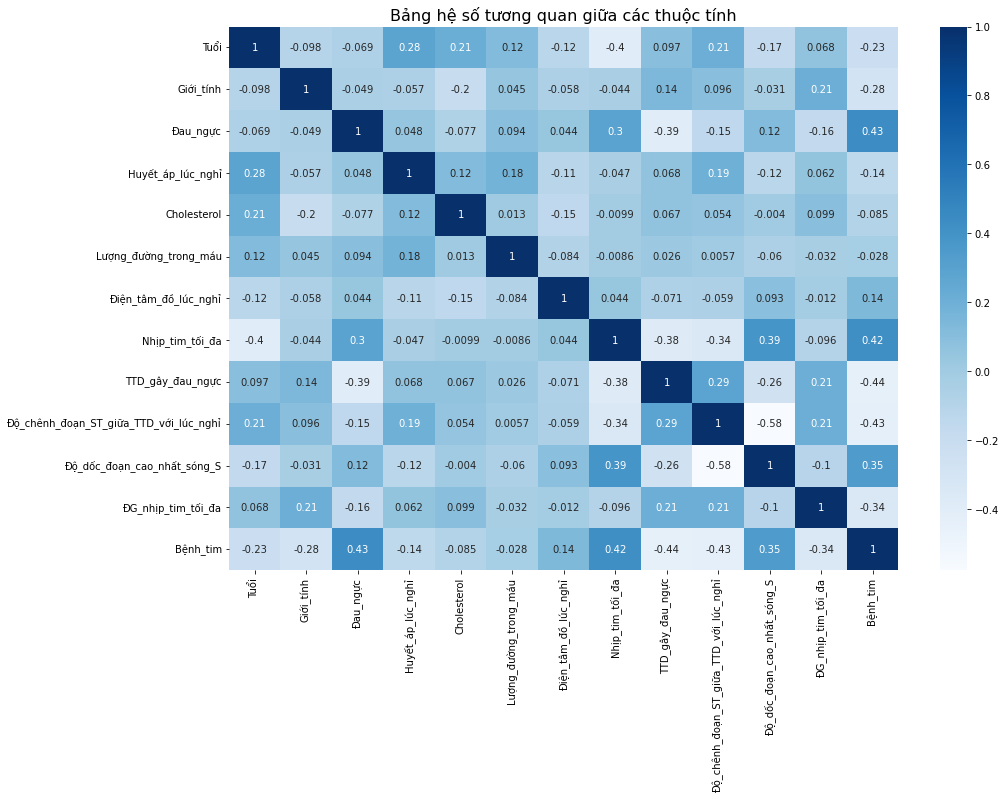

In [5]:
#Trực quan hóa dữ liệu bằng biểu đồ nhiệt Seaborn
corr = dataset.corr()
plt.figure(figsize = (15, 10))
plt.title("Bảng hệ số tương quan giữa các thuộc tính", fontsize = 16)
sns.heatmap(corr, annot = True, cmap = "Blues")

Text(0, 0.5, 'Độ chênh đoạn ST giữa lúc tập thể dục với lúc nghỉ ngơi')

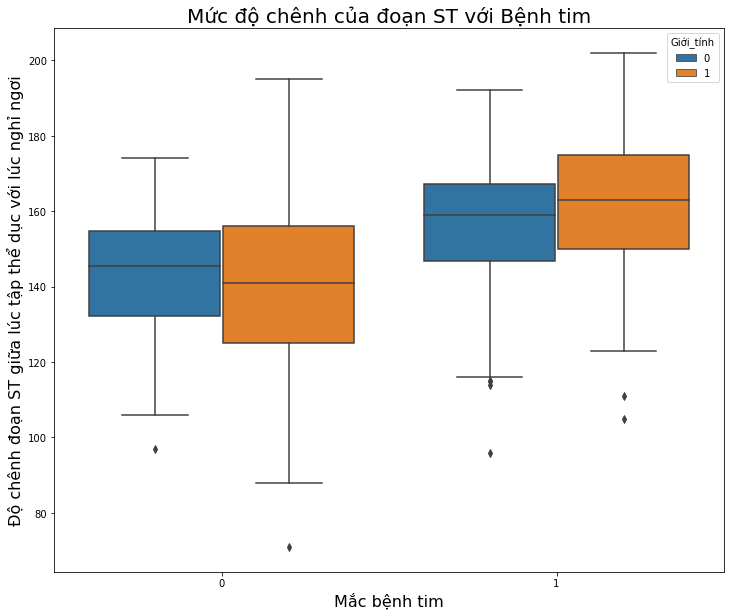

In [6]:
plt.figure(figsize=(12,10))
sns.boxplot(x= 'Bệnh_tim', y= 'Nhịp_tim_tối_đa',hue="Giới_tính", data = dataset )
plt.title("Mức độ chênh của đoạn ST với Bệnh tim", fontsize=20)
plt.xlabel("Mắc bệnh tim",fontsize=16)
plt.ylabel("Độ chênh đoạn ST giữa lúc tập thể dục với lúc nghỉ ngơi", fontsize=16)

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
numeric_ds = dataset.select_dtypes(['number'])
vif["Thuộc tính"] = numeric_ds.columns
vif["VIF"] = [variance_inflation_factor(numeric_ds.values, i) for i in range(numeric_ds.shape[1])]
vif

,Thuộc tính,VIF
0,Tuổi,37.762216
1,Giới_tính,3.679178
2,Đau_ngực,2.607694
3,Huyết_áp_lúc_nghỉ,58.576589
4,Cholesterol,26.276395
5,Lượng_đường_trong_máu,1.244533
6,Điện_tâm_đồ_lúc_nghỉ,2.080983
7,Nhịp_tim_tối_đa,47.387992
8,TTD_gây_đau_ngực,2.043815
9,Độ_chênh_đoạn_ST_giữa_TTD_với_lúc_nghỉ,3.084544


In [8]:
numeric_ds = numeric_ds.drop('Huyết_áp_lúc_nghỉ', axis=1)
vif.drop(vif.index, inplace=True)
vif["Thuộc tính"] = numeric_ds.columns
vif["VIF"] = [variance_inflation_factor(numeric_ds.values, i) for i in range(numeric_ds.shape[1])]
vif

,Thuộc tính,VIF
0,Tuổi,27.490238
1,Giới_tính,3.679007
2,Đau_ngực,2.592820
3,Cholesterol,25.936456
4,Lượng_đường_trong_máu,1.227769
5,Điện_tâm_đồ_lúc_nghỉ,2.080948
6,Nhịp_tim_tối_đa,38.172258
7,TTD_gây_đau_ngực,2.013219
8,Độ_chênh_đoạn_ST_giữa_TTD_với_lúc_nghỉ,3.003367
9,Độ_dốc_đoạn_cao_nhất_sóng_S,10.063349


In [9]:
numeric_ds = numeric_ds.drop('Tuổi', axis=1)
vif.drop(vif.index, inplace=True)
vif["Thuộc tính"] = numeric_ds.columns
vif["VIF"] = [variance_inflation_factor(numeric_ds.values, i) for i in range(numeric_ds.shape[1])]
vif

,Thuộc tính,VIF
0,Giới_tính,3.675581
1,Đau_ngực,2.583920
2,Cholesterol,20.653324
3,Lượng_đường_trong_máu,1.205995
4,Điện_tâm_đồ_lúc_nghỉ,2.075883
5,Nhịp_tim_tối_đa,36.997956
6,TTD_gây_đau_ngực,1.999112
7,Độ_chênh_đoạn_ST_giữa_TTD_với_lúc_nghỉ,2.837358
8,Độ_dốc_đoạn_cao_nhất_sóng_S,9.915923
9,ĐG_nhịp_tim_tối_đa,16.748146


In [10]:
dataset = dataset.drop(['Tuổi', 'Huyết_áp_lúc_nghỉ'], axis=1)
dataset

,Giới_tính,Đau_ngực,Cholesterol,Lượng_đường_trong_máu,Điện_tâm_đồ_lúc_nghỉ,Nhịp_tim_tối_đa,TTD_gây_đau_ngực,Độ_chênh_đoạn_ST_giữa_TTD_với_lúc_nghỉ,Độ_dốc_đoạn_cao_nhất_sóng_S,ĐG_nhịp_tim_tối_đa,Bệnh_tim
0,1,3,233,1,0,150,0,2.3,0,1,1
1,1,2,250,0,1,187,0,3.5,0,2,1
2,0,1,204,0,0,172,0,1.4,2,2,1
3,1,1,236,0,1,178,0,0.8,2,2,1
4,0,0,354,0,1,163,1,0.6,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,241,0,1,123,1,0.2,1,3,0
299,1,3,264,0,1,132,0,1.2,1,3,0
300,1,0,193,1,1,141,0,3.4,1,3,0
301,1,0,131,0,1,115,1,1.2,1,3,0


In [11]:
dataset.select_dtypes(exclude="number").nunique()

Series([], dtype: float64)

In [12]:
dataset = pd.get_dummies(dataset, drop_first=False)
dataset

,Giới_tính,Đau_ngực,Cholesterol,Lượng_đường_trong_máu,Điện_tâm_đồ_lúc_nghỉ,Nhịp_tim_tối_đa,TTD_gây_đau_ngực,Độ_chênh_đoạn_ST_giữa_TTD_với_lúc_nghỉ,Độ_dốc_đoạn_cao_nhất_sóng_S,ĐG_nhịp_tim_tối_đa,Bệnh_tim
0,1,3,233,1,0,150,0,2.3,0,1,1
1,1,2,250,0,1,187,0,3.5,0,2,1
2,0,1,204,0,0,172,0,1.4,2,2,1
3,1,1,236,0,1,178,0,0.8,2,2,1
4,0,0,354,0,1,163,1,0.6,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,241,0,1,123,1,0.2,1,3,0
299,1,3,264,0,1,132,0,1.2,1,3,0
300,1,0,193,1,1,141,0,3.4,1,3,0
301,1,0,131,0,1,115,1,1.2,1,3,0


In [13]:
heart_dis = dataset['Bệnh_tim']
dataset = dataset.drop('Bệnh_tim', axis=1)
dataset.insert(loc=len(dataset.columns), column='Bệnh_tim', value=heart_dis)
dataset

,Giới_tính,Đau_ngực,Cholesterol,Lượng_đường_trong_máu,Điện_tâm_đồ_lúc_nghỉ,Nhịp_tim_tối_đa,TTD_gây_đau_ngực,Độ_chênh_đoạn_ST_giữa_TTD_với_lúc_nghỉ,Độ_dốc_đoạn_cao_nhất_sóng_S,ĐG_nhịp_tim_tối_đa,Bệnh_tim
0,1,3,233,1,0,150,0,2.3,0,1,1
1,1,2,250,0,1,187,0,3.5,0,2,1
2,0,1,204,0,0,172,0,1.4,2,2,1
3,1,1,236,0,1,178,0,0.8,2,2,1
4,0,0,354,0,1,163,1,0.6,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,241,0,1,123,1,0.2,1,3,0
299,1,3,264,0,1,132,0,1.2,1,3,0
300,1,0,193,1,1,141,0,3.4,1,3,0
301,1,0,131,0,1,115,1,1.2,1,3,0


In [14]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=24)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=24)
classifier.fit(x_train, y_train)

SVC(random_state=24)

In [18]:
y_pred = classifier.predict(x_test)

In [19]:
result_np = np.concatenate((y_pred.reshape(len(y_pred), 1), (y_test.reshape(len(y_test), 1))), 1)
result = pd.DataFrame(result_np, columns=['Dự đoán', 'Giá trị thực tế'])
result

,Dự đoán,Giá trị thực tế
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
71,1,0
72,1,1
73,0,0
74,0,1


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69        35
           1       0.72      0.83      0.77        41

    accuracy                           0.74        76
   macro avg       0.74      0.73      0.73        76
weighted avg       0.74      0.74      0.73        76



In [21]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=classifier, X = x_train, y=y_train, cv=10)
print("Độ chính xác: {:.2f} %".format(val_score.mean()*100))
print("Độ lệch chuẩn: {:.2f} %".format(val_score.std()*100))

Độ chính xác: 84.58 %
Độ lệch chuẩn: 8.20 %


In [22]:
new_patient = [[1,3,200,1,1,160,0,1.5,1,2]]
lable_patient = classifier.predict(new_patient)
print(lable_patient)

[0]


In [23]:
#Lưu mô hình ra tệp
joblib.dump(classifier, "svm_heartdisease.mdl")

['svm_heartdisease.mdl']

In [24]:
#Đọc mô hình từ tệp
model_loaded = joblib.load("svm_heartdisease.mdl")

#Dự đoán bệnh nhân mới
new_patient = [[1,3,200,1,1,160,0,1.5,1,2]]
predicted_lable = model_loaded.predict(new_patient)

#Đưa ra kết luận
if predicted_lable == 0:
    print("Chúc mừng bệnh nhân không mắc bệnh!")
else:
    print("Xin chia buồn với gia đình bệnh nhân.")

Chúc mừng bệnh nhân không mắc bệnh!
